3. El cliente espera tener un 35% de contestación durante el mes de septiembre, según tu análisis cual fue el resultado de este ítem? Fue bueno o malo? y por que?

In [1]:
#importo las librerias necesarias para responder la pregunta

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# importo el dataset

df_clean = pd.read_csv(r"data/df_clean.csv", sep=";")

In [3]:
# cuento el número de llamadas contestadas y el número total de llamadas en septiembre
llamadas_contestadas = df_clean['Contacted'].sum()
total_llamadas_septiembre = len(df_clean)

In [4]:
porcentaje_contestacion = (llamadas_contestadas / total_llamadas_septiembre) * 100
porcentaje_contestacion

10.40822795956465

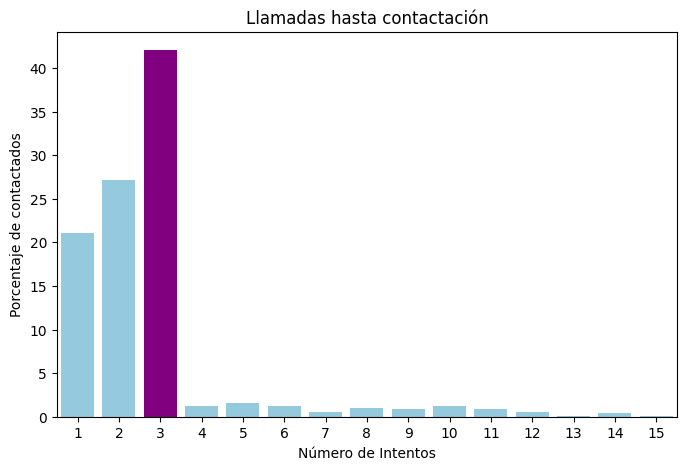

In [5]:
df_clean['Attempts'] = df_clean.groupby('Phone').cumcount() + 1

# Filtro usuarios unicos contactados
unique_contacts = df_clean[df_clean['Contacted'] == True]

# cuento cuantas veces se ha llamado a cada numero
contact_attempts = unique_contacts.groupby('Phone')['Attempts'].max()

# Obtengo la cantidad total de usuarios contactados
total_users_contacted = len(contact_attempts)

# calculo el porcentaje de usuarios por intento
percentage_contacted = (contact_attempts.value_counts() / total_users_contacted) * 100

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage_contacted.index, y=percentage_contacted, color='skyblue')
ax.patches[2].set_fc('purple')
plt.title('Llamadas hasta contactación')
plt.xlabel('Número de Intentos')
plt.ylabel('Porcentaje de contactados')
plt.show()

In [6]:
# cuento el número de usuarios únicos y el número de usuarios únicos que contestaron al menos una vez
clientes_totales = df_clean['Phone'].nunique()
clientes_contactados = df_clean[df_clean['Contacted']]['Phone'].nunique()

# Calculo el porcentaje de contestación por usuario único
porcentaje_contactabilidad = (clientes_contactados / clientes_totales) * 100
porcentaje_contactabilidad

27.53256150506512

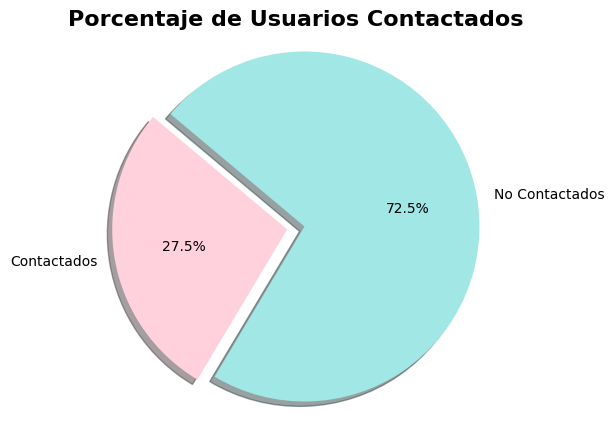

In [7]:
# Porcentajes
porcentaje_no_contactados = 100 - porcentaje_contactabilidad
porcentajes = [porcentaje_contactabilidad, porcentaje_no_contactados]
etiquetas = ['Contactados', 'No Contactados']
colores = ['#FFD1DC', '#A0E7E5']
explode = (0.1, 0)
shadow = True

# Crear un gráfico de torta creativo
plt.figure(figsize=(5, 5))
plt.pie(porcentajes, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140, explode=explode, shadow=shadow)
plt.title('Porcentaje de Usuarios Contactados', fontsize=16, fontweight='bold')
plt.axis('equal')  # Aspecto igual para que el gráfico sea un círculo

plt.show()

El resultado del porcentaje de contestación durante el mes de septiembre fue del 10.41%. Teniendo en cuenta el objetivo del cliente de alcanzar un 35%, este resultado puede considerarse malo.

Sin embargo este porcentaje se calcula con el número total de llamadas realizadas y las respuestas recibidas. Este cálculo puede no reflejar completamente la efectividad de las gestiones, ya que no tiene en cuenta el número de llamadas realizadas hasta lograr el contacto exitoso.

Como se puede observar en el gráfico, mas del 40% de usuarios, requirió ser llamado 3 veces para lograr la contactación.

Por este motivo consideré relevante también, evaluar el porcentaje por usuario único. Al hacerlo, obtuve una métrica que proporciona una visión más precisa de cuántos usuarios se contactaron exitosamente durante el mes de septiembre, lo que puede ser más representativo de la efectividad de las gestiones.

Por lo tanto, el porcentaje de contestación del 10.41% es bajo en comparación con el objetivo del 35%. 
Considerando la métrica alternativa, el porcentaje de contestación por usuario único fue de 27.53%. Creo que este dato da una imagen más completa de la efectividad de las llamadas.